In [20]:
import numpy as np
import pandas as pd 
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 12)

In [31]:
data_inicio = '2015-01-01'
data_fim = '2022-01-01'

In [32]:
df = data.DataReader('petr4.sa', 'yahoo', data_inicio, data_fim)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.990000,9.350000,9.990000,9.360000,49559500.0,7.928355
2015-01-05,9.190000,8.530000,9.140000,8.560000,78385100.0,7.250719
2015-01-06,8.830000,8.040000,8.710000,8.280000,84723300.0,7.013545
2015-01-07,8.730000,8.360000,8.560000,8.670000,85531000.0,7.343894
2015-01-08,9.390000,8.740000,8.790000,9.230000,83306300.0,7.818239
...,...,...,...,...,...,...
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000
2021-09-03,26.780001,26.100000,26.650000,26.330000,58182700.0,26.330000


#### Adicionando a média móvel de 7 dias e 21 dias ao dataframe

In [33]:
df['mm5d'] = df['Close'].rolling(5).mean()
df['mm21d'] = df['Close'].rolling(21).mean()

In [34]:
df_train = df.copy()
df_train["data_pregao"] = df.index
df_train

,High,Low,Open,Close,Volume,Adj Close,mm5d,mm21d,data_pregao
Date,,,,,,,,,
2015-01-02,9.990000,9.350000,9.990000,9.360000,49559500.0,7.928355,NaN,NaN,2015-01-02
2015-01-05,9.190000,8.530000,9.140000,8.560000,78385100.0,7.250719,NaN,NaN,2015-01-05
2015-01-06,8.830000,8.040000,8.710000,8.280000,84723300.0,7.013545,NaN,NaN,2015-01-06
2015-01-07,8.730000,8.360000,8.560000,8.670000,85531000.0,7.343894,NaN,NaN,2015-01-07
2015-01-08,9.390000,8.740000,8.790000,9.230000,83306300.0,7.818239,8.820,NaN,2015-01-08
...,...,...,...,...,...,...,...,...,...
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001,27.702,27.769048,2021-09-01
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000,27.524,27.784286,2021-09-02
2021-09-03,26.780001,26.100000,26.650000,26.330000,58182700.0,26.330000,27.092,27.688095,2021-09-03


In [35]:
df_train['Close'] = df_train['Close'].shift(-1)
df_train

,High,Low,Open,Close,Volume,Adj Close,mm5d,mm21d,data_pregao
Date,,,,,,,,,
2015-01-02,9.990000,9.350000,9.990000,8.560000,49559500.0,7.928355,NaN,NaN,2015-01-02
2015-01-05,9.190000,8.530000,9.140000,8.280000,78385100.0,7.250719,NaN,NaN,2015-01-05
2015-01-06,8.830000,8.040000,8.710000,8.670000,84723300.0,7.013545,NaN,NaN,2015-01-06
2015-01-07,8.730000,8.360000,8.560000,9.230000,85531000.0,7.343894,NaN,NaN,2015-01-07
2015-01-08,9.390000,8.740000,8.790000,9.510000,83306300.0,7.818239,8.820,NaN,2015-01-08
...,...,...,...,...,...,...,...,...,...
2021-09-01,27.340000,26.330000,27.320000,26.600000,69430400.0,27.040001,27.702,27.769048,2021-09-01
2021-09-02,27.350000,26.459999,27.000000,26.330000,56052000.0,26.600000,27.524,27.784286,2021-09-02
2021-09-03,26.780001,26.100000,26.650000,26.459999,58182700.0,26.330000,27.092,27.688095,2021-09-03


In [36]:
df_train.dropna(inplace=True)

In [37]:
df_train.reset_index(drop=True)

,High,Low,Open,Close,Volume,Adj Close,mm5d,mm21d,data_pregao
0,8.340000,8.080000,8.200000,8.790000,87497200.0,7.030486,9.210,9.230476,2015-01-30
1,8.790000,8.130000,8.460000,9.970000,57585100.0,7.445539,9.002,9.203333,2015-02-02
2,10.000000,9.010000,9.010000,10.020000,98061700.0,8.445054,8.968,9.270476,2015-02-03
3,10.780000,9.560000,10.300000,9.830000,117595000.0,8.487406,9.150,9.353333,2015-02-04
4,10.290000,9.700000,9.860000,9.120000,78992700.0,8.326468,9.382,9.408571,2015-02-05
...,...,...,...,...,...,...,...,...,...
1631,28.230000,26.990000,28.200001,27.040001,110574300.0,27.190001,27.840,27.760000,2021-08-31
1632,27.340000,26.330000,27.320000,26.600000,69430400.0,27.040001,27.702,27.769048,2021-09-01
1633,27.350000,26.459999,27.000000,26.330000,56052000.0,26.600000,27.524,27.784286,2021-09-02
1634,26.780001,26.100000,26.650000,26.459999,58182700.0,26.330000,27.092,27.688095,2021-09-03


In [38]:
n_rows = len(df_train)
rows_train = round(0.7 * n_rows)
rows_test = n_rows - rows_train
rows_validate =  n_rows -1

info = (
    f"linhas treino= 0:{rows_train}"
    f" linhas teste= {rows_train}:{rows_train + rows_test}"
    f" linhas validação= {rows_validate}:{n_rows}"
)

info

'linhas treino= 0:1145 linhas teste= 1145:1636 linhas validação= 1635:1636'

In [40]:
features = df_train.drop(['Close', 'Adj Close', 'data_pregao'], 1)
labels = df_train['Close']

C:\Users\pcosm\AppData\Local\Temp/ipykernel_4092/3874700129.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = df_train.drop(['Close', 'Adj Close', 'data_pregao'], 1)


Date
2015-01-30     8.790000
2015-02-02     9.970000
2015-02-03    10.020000
2015-02-04     9.830000
2015-02-05     9.120000
                ...    
2021-08-31    27.040001
2021-09-01    26.600000
2021-09-02    26.330000
2021-09-03    26.459999
2021-09-06    24.969999
Name: Close, Length: 1636, dtype: float64

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### O K Best é usado para decidir a melhor variável dentro de todas as features

In [42]:
features_list = ('Open','High','Low','Volume','mm5d','mm21d')



k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Best features:")
print (k_best_features_final)


Best features:
{'Low': 173.64696514873972, 'High': 157.13468575530302, 'Volume': 141.0106448848833, 'mm21d': 89.64710655608812, 'mm5d': 0.9269760128046314}


In [44]:
features = df_train.loc[:,['Low','High', 'Volume', 'mm21d']]
features

,Low,High,Volume,mm21d
Date,,,,
2015-01-30,8.080000,8.340000,87497200.0,9.230476
2015-02-02,8.130000,8.790000,57585100.0,9.203333
2015-02-03,9.010000,10.000000,98061700.0,9.270476
2015-02-04,9.560000,10.780000,117595000.0,9.353333
2015-02-05,9.700000,10.290000,78992700.0,9.408571
...,...,...,...,...
2021-08-31,26.990000,28.230000,110574300.0,27.760000
2021-09-01,26.330000,27.340000,69430400.0,27.769048
2021-09-02,26.459999,27.350000,56052000.0,27.784286


In [45]:
X_train = features[:rows_train]
X_test = features[rows_train:rows_train + rows_test -1]

y_train = labels[:rows_train]
y_test = labels[rows_train:rows_train + rows_test -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

1145 1145
490 490


In [46]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [47]:
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:96.64'

In [54]:
valor_novo = features.tail(58)
valor_novo

,Low,High,Volume,mm21d
Date,,,,
2021-06-16,28.770000,29.290001,77432900.0,27.424286
2021-06-17,27.910000,29.200001,95264600.0,27.509048
2021-06-18,27.639999,28.420000,115250700.0,27.612381
2021-06-21,28.400000,29.000000,50709600.0,27.756191
2021-06-22,28.670000,29.270000,41602700.0,27.906191
2021-06-23,29.000000,29.520000,57278500.0,28.044762
2021-06-24,29.219999,29.650000,51447000.0,28.226191
2021-06-25,28.950001,29.790001,84950900.0,28.369524
2021-06-28,28.670000,29.270000,40341200.0,28.519048


In [55]:
previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)

pred

array([29.10529524, 28.51850406, 28.10279758, 28.69207016, 28.94741633,
       29.28533636, 29.46405907, 29.38836494, 28.92826247, 28.94807144,
       29.25595776, 29.34757446, 28.99096038, 28.70521358, 28.18507901,
       27.73891478, 27.49695814, 27.48577982, 27.59795671, 27.80703723,
       27.22205032, 26.90912931, 26.12223877, 26.29404536, 26.84060358,
       26.89274529, 26.85123814, 27.00888878, 27.12047648, 27.48851966,
       27.69689942, 27.26970949, 26.80772382, 26.23175536, 26.34157444,
       28.80405479, 28.29048888, 27.98430705, 28.58603165, 28.49836999,
       28.92256571, 29.39943979, 28.76786709, 26.97657815, 26.98901198,
       26.47286903, 26.43328911, 27.04061779, 27.43205976, 27.58815233,
       27.65747395, 28.07084469, 28.5180222 , 27.58005721, 26.74394021,
       26.80992244, 26.37533895, 26.32716177])

In [56]:
data_pregao_full=df_train['data_pregao']
data_pregao=data_pregao_full.tail(58)

res_full=df_train['Close']
res=res_full.tail(58)

df_n=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df_n.set_index('data_pregao', inplace=True)

df_n

,real,previsao
data_pregao,,
2021-06-16,28.129999,29.105295
2021-06-17,28.320000,28.518504
2021-06-18,28.950001,28.102798
2021-06-21,29.100000,28.692070
2021-06-22,29.299999,28.947416
2021-06-23,29.650000,29.285336
2021-06-24,29.100000,29.464059
2021-06-25,29.049999,29.388365
2021-06-28,29.180000,28.928262


## Usando a média movel pode-se ver que o modelo apesar não possuir precisão no valor exato, costuma acertar a tendência

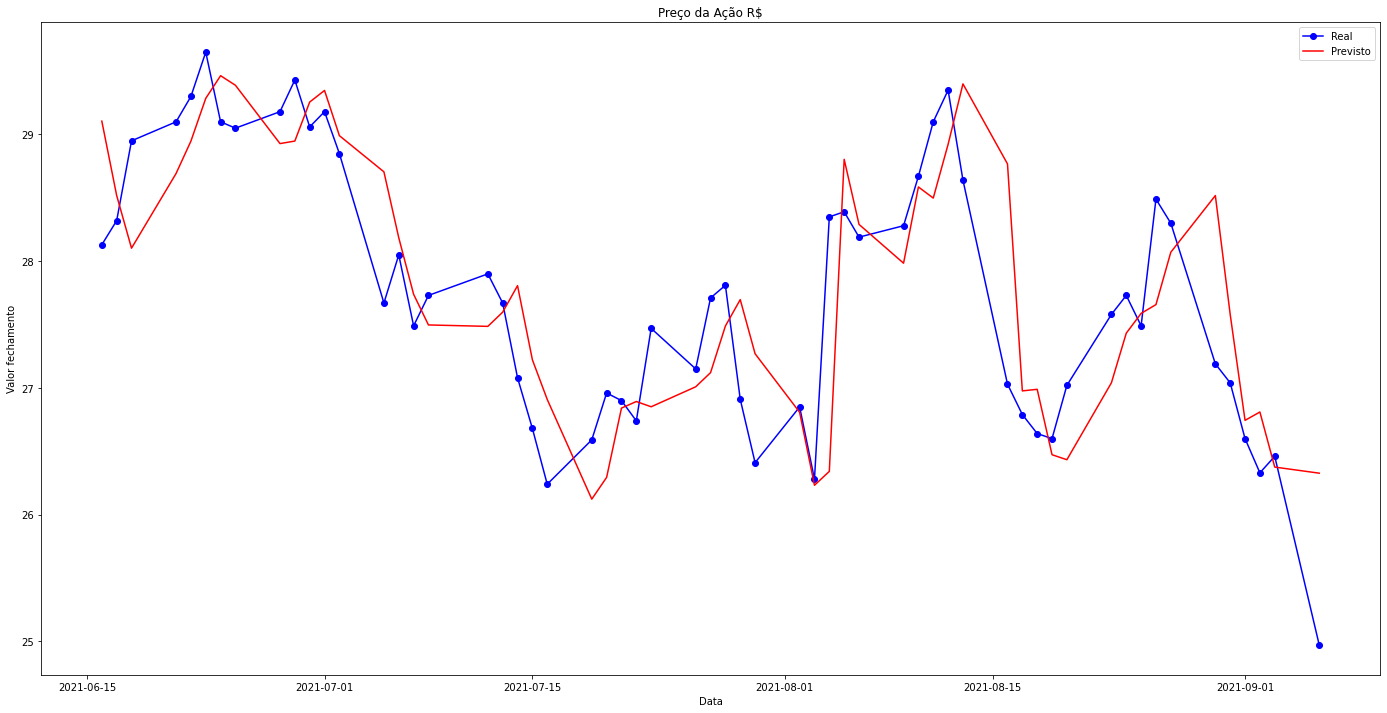

In [58]:
plt.title("Preço da Ação R$")
plt.plot(df_n["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df_n["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

In [60]:
for index, row in df_n.iterrows():
    df_n.loc[index,'diferenca'] = (df_n.loc[index,'real'] - df_n.loc[index,'previsao']);

In [61]:
df_n

,real,previsao,diferenca
data_pregao,,,
2021-06-16,28.129999,29.105295,-0.975296
2021-06-17,28.320000,28.518504,-0.198504
2021-06-18,28.950001,28.102798,0.847203
2021-06-21,29.100000,28.692070,0.407930
2021-06-22,29.299999,28.947416,0.352583
2021-06-23,29.650000,29.285336,0.364663
2021-06-24,29.100000,29.464059,-0.364059
2021-06-25,29.049999,29.388365,-0.338366
2021-06-28,29.180000,28.928262,0.251738
